## Источник: https://www.kaggle.com/joeshamen/world-university-rankings-2020¶

## Описание

Times Higher Education предоставляет достоверные данные об университетах с 2004 года. Это единственная глобальная таблица рейтинга университетов, в которой оцениваются научно-исследовательские университеты по всем их основным задачам.
Почему же я выбрала именно такой датасет? Во-первых, тема образования и его качества всегда являлась актуальной и интересной (особенно, когда ты сам студент). Во-вторых, этот рейтинг имеет много интересных переменных, достаточное количество объектов, что явно будет плюсом в работе с ним. 

Теперь подробнее опишем сами переменные. Сразу отмечу, что в качестве зависимой переменной я выбрала Industry_Income (доход заведения), так как мне кажется, что тема финансов интересна, да и этот аспект является показательным для многих. Любопытно узнать, что и как влияет на доход. 
Количество студентов, как и количество студентов на одного преподавателя, общая сумма иностраннных студентов отображают масштабность заведения, его популярность. Процентное соотношение мужчин и женщин на первый взгляд бессмысленные переменные, но посмотрим, играет ли она всё-таки роль в нашем исследовании. Оценки преподавания, исследований, цитирования, упоминаний в иностранных источниках - это оценки по 100-балльной шкале, которые поданы в таком виде для удобства. Их присутствие в рейтинге логично и понятно. ВВП на душу населения-показатель, который добавила в рейтинг лично я, так как очень интересно его влияние на доход университета (а может его и нет вовсе). 

Задачей моего исследования является определение наиболее влияющих на доход университета факторов. "И для чего это?"-спросите вы. Результаты могут быть полезны для администрации университета, которая хочет поднять доходы, для правительства, так как доход университета напрямую связан с гос. бюджетом, для абитуриентов, которые выбирают ВУЗ для поступления, для потенциальных инвесторов и для многого другого.

Займемся установкой пакетов, которые записаны нами же ранее в отдельном файле.

!pip install -r requirements.txt

Эти библиотеки были установлены ранее и добавлены в requirements.txt, поэтому сейчас поданы в виде комментария.

!pip install numpy

!pip install matplotlib

!pip install pandas

## Импорт датасета

Импортируем указанные библиотеки под сокращенным именем для удобства.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Записываем в переменную df наш датасет.

In [14]:
df = pd.read_csv('University2020.csv', sep=';')

Выведем датасет для проверки. Видим, что всё отображается корректно.

In [15]:
df

,Rank_Char,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,International_Outlook,GDP,Industry_Income
0,1,University of Oxford,United Kingdom,20664,11.2,8472.0,0.46,0.54,90.5,99.6,98.4,96.4,41627.0,65.5
1,2,California Institute of Technology,United States,2240,6.4,672.0,0.34,0.66,92.1,97.2,97.9,82.5,60236.0,88.0
2,3,University of Cambridge,United Kingdom,18978,10.9,7022.0,0.47,0.53,91.4,98.7,95.8,95.0,41627.0,59.3
3,4,Stanford University,United States,16135,7.3,3711.0,0.43,0.57,92.8,96.4,99.9,79.5,60236.0,66.2
4,5,Massachusetts Institute of Technology,United States,11247,8.6,3824.0,0.39,0.61,90.5,92.4,99.5,89.0,60236.0,86.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,1392,Cear? State University,Brazil,20174,17.8,0.0,0.55,0.45,16.2,8.3,6.1,16.3,14064.0,35.6
1392,1393,Pontifical Catholic University of Minas Gerais,Brazil,34101,21.3,0.0,0.57,0.43,15.3,7.7,6.7,19.4,14064.0,35.1
1393,1394,Bashkir State University,Russian Federation,15236,11.1,3.0,0.63,0.37,17.0,8.1,4.5,16.7,28053.0,36.9
1394,1395,University of Caxias do Sul,Brazil,17101,24.9,0.0,0.54,0.46,13.8,7.8,7.6,17.7,14064.0,35.0


Теперь немного проанализируем наши данные. У нас 1396 элементов, 14 столбцов. 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank_Char                1396 non-null   int64  
 1   University               1396 non-null   object 
 2   Country                  1396 non-null   object 
 3   Number_students          1396 non-null   int64  
 4   Numb_students_per_Staff  1396 non-null   float64
 5   International_Students   1394 non-null   float64
 6   Percentage_Female        1396 non-null   float64
 7   Percentage_Male          1396 non-null   float64
 8   Teaching                 1396 non-null   float64
 9   Research                 1396 non-null   float64
 10  Citations                1396 non-null   float64
 11  International_Outlook    1396 non-null   float64
 12  GDP                      1395 non-null   float64
 13  Industry_Income          1396 non-null   float64
dtypes: float64(10), int64(2)

Конечно же, мы заметили, что есть столбцы с совершенно бесполезными в нашем случае для анализа данными. Например, название университета, страна и номер ВУЗа в рейтинге. 

In [18]:
df = df.drop(['Rank_Char','University','Country'], axis='columns', inplace=False)
df.head(5)

,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,International_Outlook,GDP,Industry_Income
0,20664,11.2,8472.0,0.46,0.54,90.5,99.6,98.4,96.4,41627.0,65.5
1,2240,6.4,672.0,0.34,0.66,92.1,97.2,97.9,82.5,60236.0,88.0
2,18978,10.9,7022.0,0.47,0.53,91.4,98.7,95.8,95.0,41627.0,59.3
3,16135,7.3,3711.0,0.43,0.57,92.8,96.4,99.9,79.5,60236.0,66.2
4,11247,8.6,3824.0,0.39,0.61,90.5,92.4,99.5,89.0,60236.0,86.9


## Статистика

Посмотрим на статистику наших данных. Она будет крайне полезна при дальнейшей обработке.

In [19]:
df.describe()

,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,International_Outlook,GDP,Industry_Income
count,1396.000000,1396.000000,1394.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1395.000000,1396.000000
mean,23723.029370,18.966905,1903.202296,0.475279,0.477443,28.229083,23.981160,48.113109,47.114542,36352.659498,46.477292
std,32826.064794,16.835492,2797.823205,0.160516,0.160835,14.149550,17.537044,27.735626,23.288723,18059.003796,16.273498
min,558.000000,0.900000,0.000000,0.000000,0.000000,11.200000,6.800000,1.700000,13.100000,2178.000000,34.400000
25%,10262.000000,12.375000,4.000000,0.410000,0.410000,18.300000,11.600000,23.375000,27.475000,17287.000000,35.775000
50%,17832.500000,16.350000,657.500000,0.520000,0.470000,23.800000,18.000000,45.650000,43.100000,41380.000000,39.400000
75%,29434.000000,21.900000,2883.250000,0.570000,0.560000,33.600000,30.100000,71.950000,62.800000,48698.000000,49.825000
max,830104.000000,493.500000,21797.000000,1.000000,1.000000,92.800000,99.600000,100.000000,99.700000,110261.000000,100.000000


## Выбросы

Совсем нетипичные данные будут только мешать, поэтому удалим объекты, где количество студентов выше, чем 100000, а также, где количесвто иностранных студентов выше, чем 10000. Видим, что было удалено всего лишь 40 университетов. Это немного, если сравнивать с общим количеством. 

In [20]:
df = df.drop(df[df.Number_students > 100000].index)
df = df.drop(df[df.International_Students > 10000].index)
df.describe()

,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,International_Outlook,GDP,Industry_Income
count,1356.000000,1356.000000,1354.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1355.000000,1356.000000
mean,20786.775811,18.301622,1716.901773,0.474130,0.477935,27.989602,23.609513,47.877729,46.694543,36491.912177,46.445133
std,14584.730967,10.203205,2310.899676,0.161705,0.162269,13.805243,17.001762,27.574358,23.085085,18050.941259,16.251138
min,558.000000,0.900000,0.000000,0.000000,0.000000,11.200000,6.800000,1.700000,13.100000,2178.000000,34.400000
25%,10022.500000,12.275000,4.000000,0.400000,0.410000,18.375000,11.600000,23.300000,27.100000,17287.000000,35.800000
50%,17366.000000,16.250000,624.500000,0.520000,0.470000,23.800000,17.900000,45.500000,42.600000,41380.000000,39.400000
75%,28334.500000,21.600000,2734.000000,0.572500,0.560000,33.225000,29.825000,71.200000,62.100000,50268.500000,49.750000
max,97843.000000,108.800000,9837.000000,1.000000,1.000000,92.800000,99.600000,100.000000,99.700000,110261.000000,100.000000


Визуализируем данные по количеству студентов, по количеству иностранных студентов и по ВВП.

<AxesSubplot:ylabel='Frequency'>

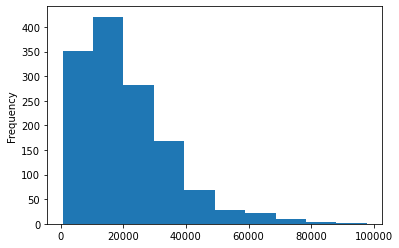

In [21]:
df['Number_students'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

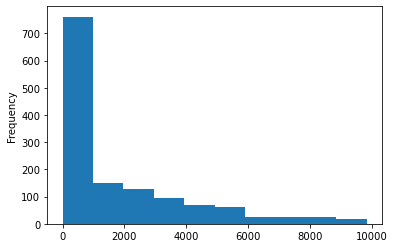

In [22]:
df['International_Students'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

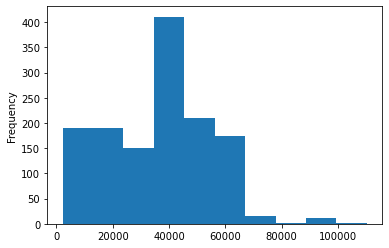

In [23]:
df['GDP'].plot(kind = 'hist')

## Пропуски

Проверим данные на наличие пропусков.

In [24]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
International_Students,2,0.001475
GDP,1,0.000737
Industry_Income,0,0.000000
International_Outlook,0,0.000000
Citations,0,0.000000
Research,0,0.000000
Teaching,0,0.000000
Percentage_Male,0,0.000000
Percentage_Female,0,0.000000
Numb_students_per_Staff,0,0.000000


Обнаружено 2 пропуска по иностранным студентам и 1 по ВВП. Заполним их средним значением по соответствующим категориям. Для этого пропишем функцию fill_missing_num.

In [28]:
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

Применяем прописанную функцию для заполнения пропусков.

In [29]:
from sklearn.impute import SimpleImputer
df = fill_missing_num(df)

Проверим ещё раз на пропуски. Видим, что теперь их нет.

In [30]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Industry_Income,0,0.0
GDP,0,0.0
International_Outlook,0,0.0
Citations,0,0.0
Research,0,0.0
Teaching,0,0.0
Percentage_Male,0,0.0
Percentage_Female,0,0.0
International_Students,0,0.0
Numb_students_per_Staff,0,0.0


## Корреляционная матрица

Выводим матрицу корреляций, чтобы посмотреть на зависимости переменных.

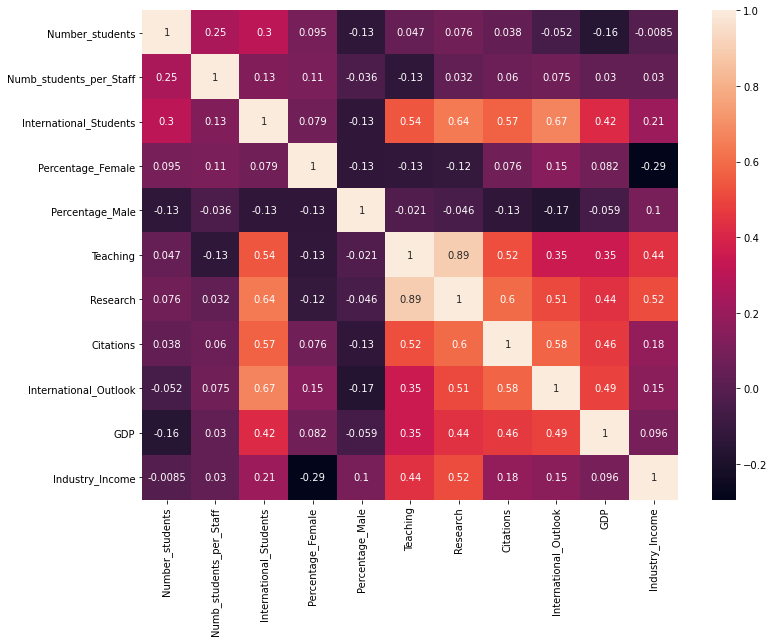

In [31]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Видим, что исследования достаточно сильно коррелируют с преподаванием, а упоминания в иностранных источниках с цитированием, поэтому удалим их.

In [32]:
df = df.drop(['Research','International_Outlook'], axis='columns', inplace=False)
df.head(5)

,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Citations,GDP,Industry_Income
0,20664.0,11.2,8472.0,0.46,0.54,90.5,98.4,41627.0,65.5
1,2240.0,6.4,672.0,0.34,0.66,92.1,97.9,60236.0,88.0
2,18978.0,10.9,7022.0,0.47,0.53,91.4,95.8,41627.0,59.3
3,16135.0,7.3,3711.0,0.43,0.57,92.8,99.9,60236.0,66.2
4,11247.0,8.6,3824.0,0.39,0.61,90.5,99.5,60236.0,86.9


## Экспорт датасета

Сохраняем наш подготовленный датасет.

In [33]:
df.to_csv('University_prep.csv', sep=';', index=False)